## Principal Component Analysis (PCA):

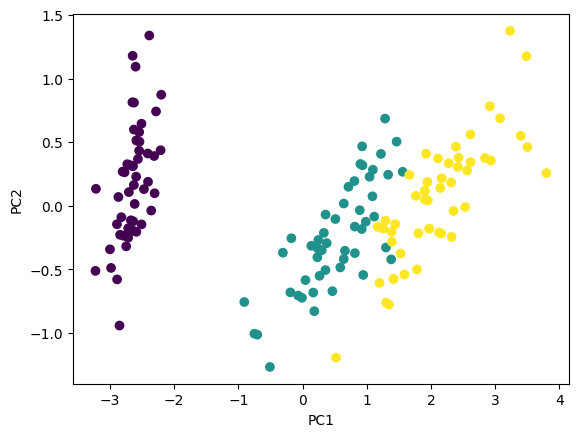

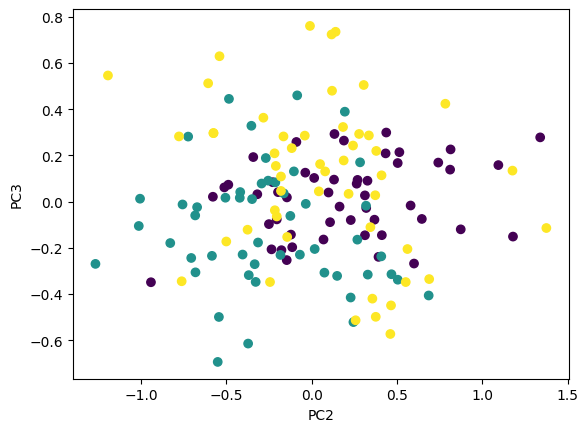

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load IRIS dataset
iris= load_iris()

# Let's say we want to reduce the data to two diamensions
pca= PCA(n_components=3)

# Fit and transform the data
iris_pca= pca.fit_transform(iris.data)

# Now we can plot the first two principal components
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c= iris.target) # Target class mtlb species 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Now we can plot the first two principal components
plt.scatter(iris_pca[:, 1], iris_pca[:, 2], c= iris.target) # Target class mtlb species 
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

In [7]:
iris_pca.mean()

np.float64(-1.6105635343895603e-15)

## Do PCA work on Tips dataset:

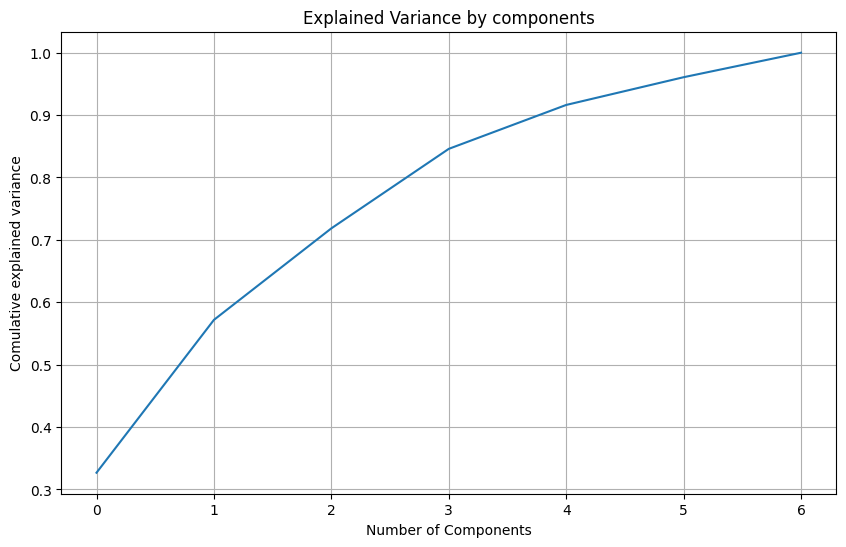

                 PC1       PC2       PC3       PC4       PC5       PC6  \
total_bill  0.577289  0.133642  0.164816  0.061756 -0.058183  0.378659   
tip         0.531650  0.178333  0.159316 -0.010375 -0.637807 -0.274214   
sex         0.189111 -0.152571 -0.588523  0.762364  0.000506 -0.115541   
smoker      0.036649 -0.335732  0.724260  0.501763  0.212334  0.111732   
day        -0.156579  0.660434 -0.047053  0.229846  0.003218  0.606759   
time       -0.281249  0.556479  0.266919  0.297170 -0.004329 -0.572115   
size        0.493317  0.261729 -0.055523 -0.148236  0.738039 -0.245190   

                 PC7  
total_bill  0.686390  
tip        -0.421978  
sex         0.007162  
smoker     -0.228151  
day        -0.340735  
time        0.352618  
size       -0.241370  


In [23]:
# import libraries:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Load IRIS dataset
tips= sns.load_dataset('tips')

# Encode the data
le= LabelEncoder()

cat_features= tips.select_dtypes(include='category').columns
for features in cat_features:
    tips[features]= le.fit_transform(tips[features])

# Standardize the data
scaler= StandardScaler()
tips_scaled= scaler.fit_transform(tips)

# Apply pca
pca= PCA()
X_pca= pca.fit_transform(tips_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Comulative explained variance')
plt.title('Explained Variance by components')
plt.grid()
plt.show()

# Create a Dataframe to show the loadings
loadings= pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
print(loadings)

In [4]:
cat_features

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

<Axes: xlabel='PC1', ylabel='PC2'>

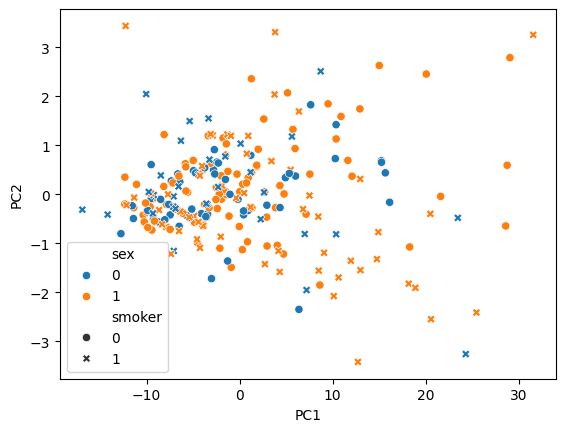

In [27]:
# Prepare the data fo PCA
X= tips[['total_bill', 'tip', 'size']]

# Standardize the data
X= (X - X.mean() / X.std())

# Perform PCA with two components
pca= PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca= pca.transform(X)

# Add the principal components to the dataset
tips['PC1']= X_pca[:, 0]
tips['PC2']= X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x= 'PC1', y='PC2', data=tips, hue='sex', style='smoker')

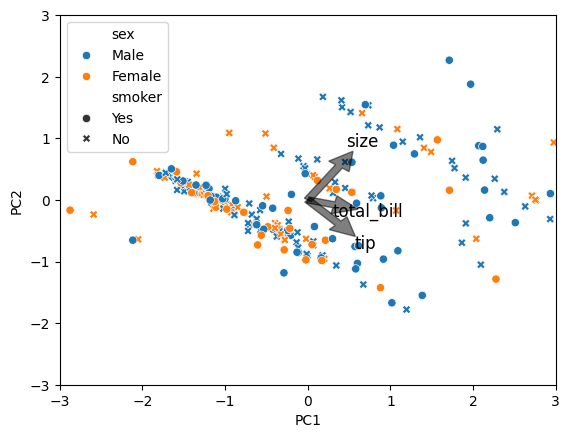

In [33]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')
# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]
# Standardize the data
X = (X - X.mean()) / X.std()
# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)
# Transform the data into the principal component space
X_pca = pca.transform(X)
   
# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')
# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)
# Set the axis limits\n",
plt.xlim(-3, 3)
plt.ylim(-3, 3)
# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')
# Show the plot
plt.show()

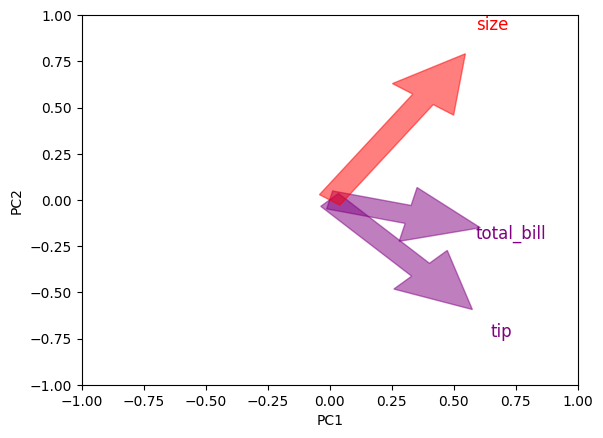

In [34]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')
# Prepare the data for PCA\n",
X = tips[['total_bill', 'tip', 'size']]
X = (X - X.mean()) / X.std()
# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)
# Add arrows indicating the direction and strength of each original feature in the principal component space\n",
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)
# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)
# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')
# Show the plot
plt.show()

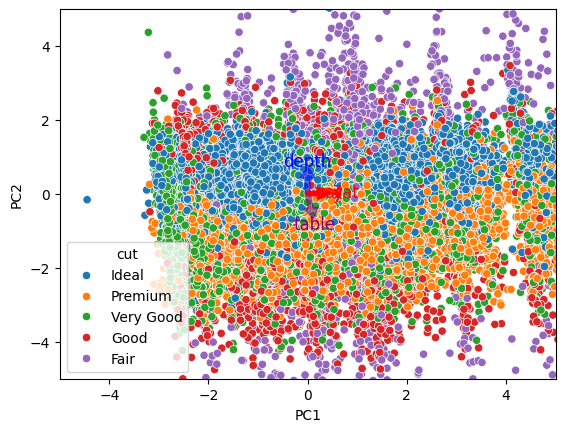

In [35]:
# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')
# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
# Standardize the data
X = (X - X.mean()) / X.std()
# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)
# Transform the data into the principal component space\n",
X_pca = pca.transform(X)
# Add the principal components to the dataset
diamonds['PC1'] = X_pca[:, 0]
diamonds['PC2'] = X_pca[:, 1]
# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=diamonds, hue='cut')
# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)
    
# Set the axis limits\n",
plt.xlim(-5, 5)
plt.ylim(-5, 5)
# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')
# Show the plot\n",
plt.show()